# Classification after Feature Engineering

In [ ]:
import numpy as np
import pandas as pd
pd.pandas.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.cm as cm

# explainable AI
import shap

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

from sklearn.metrics import accuracy_score

/opt/anaconda3/envs/py312_pjt/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-27 14:57:09.100637: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Loading the Feature Engineered 2022 and 2023 data's

In [3]:
# dataset_2022 = pd.read_csv('feature_engineered_2022data.csv' )
# dataset_2023 = pd.read_csv('feature_engineered_2023data.csv' )
# dataset_2023

In [ ]:
# combining 2022 and 2023

# dataset_2022['YEAR'] = 2022
# dataset_2023['YEAR'] = 2023

# combined_data = pd.concat([dataset_2023, dataset_2022], ignore_index=True)
# combined_data

,CATAG7,HEALTH,EDUHIGHCAT,IRSEX,NEWRACE2,BOOKED,COCAGE,CRKAGE,ECSTMOAGE,HALLUCAGE,HERAGE,METHAMAGE,MJAGE,PNRNMAGE,SEDNMAGE,STMNMAGE,TRQNMAGE,AMIPY,IRAMDEYR,SPDPSTMON,KRATOMFLAG,KRATOMYR,CRKYR,UD5CNSANY,UD5ILALANY,UD5ILLANY,UD5OPIANY,UD5TRQSDANY,SVYROPIANY,SVYRPSYANY,SVYRSUDANY,CCDAYPYR,CRKYDAYS,METHNDAYYR,INHNDAYYR,HALLNDAYYR,HERYDAYS,MRJYDAYS,COCYDAYS,IRPYUD5ALC,MJYRTOT,COCYR,HERYR,METHAMYR,INHALYR,PNRNMYR,MRJYR,HALLUCYR,TRQNMYR,STMNMYR,SEDNMYR,LSDYR,OPIANYYR,SUTINPPY,SUTOUTALCPY,SUTOUTCOCPY,SUTOUTHALPY,SUTOUTHERPY,SUTOUTMRJPY,SUTOUTMTHPY,SUTOUTOPIPY,SUTOUTPNRPY,SUTOUTPPY,SUTOUTSEDPY,SUTOUTSTMPY,SUTOUTTQSDPY,SUTOUTTRQPY,SUTRTPY,SUTOUTDRGPY,SUTRTDRGPY,SUTRTALCPY,IRSUTINRHAB,IRSUTINHOSP,IRSUTOUTRHAB,IRSUTRXALC,IRSUTRXDRG,MRJMON,COCMON,HERMON,HALLUCMON,INHALMON,METHAMMON,PNRNMMON,TRQNMMON,STMNMMON,SEDNMMON,LSDMON,OPINMMON,CRKMON,KRATOMMON,RECEIVED_TREATMENT,USE_SUBSTANCE_LASTMONTH,RELAPSE_SCORE,RELAPSE_CLASS,YEAR
0,7.0,2.0,3.0,1.0,7.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.107584,0,2023
1,7.0,2.0,2.0,1.0,1.0,2.0,20.0,991.0,23.0,21.0,991.0,991.0,17.0,993.0,993.0,993.0,993.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,993.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.067516,0,2023
2,7.0,3.0,2.0,2.0,4.0,1.0,991.0,991.0,991.0,991.0,991.0,20.0,991.0,991.0,991.0,991.0,991.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,4.0,3.0,991.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.957290,1,2023
3,7.0,1.0,4.0,1.0,6.0,1.0,991.0,991.0,991.0,15.0,991.0,991.0,15.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.040822,0,2023
4,4.0,3.0,2.0,1.0,1.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.123989,0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102492,7.0,4.0,4.0,2.0,1.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.103197,0,2022
102493,7.0,3.0,2.0,1.0,2.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [2]:

# treatment variables
treatment_vars = [
        "SUTINPPY",
        "SUTOUTALCPY",
        "SUTOUTCOCPY",
        "SUTOUTHALPY",
        "SUTOUTHERPY",
        "SUTOUTMRJPY",
        "SUTOUTMTHPY",
        "SUTOUTOPIPY",
        "SUTOUTPNRPY",
        "SUTOUTPPY",
        "SUTOUTSEDPY",
        "SUTOUTSTMPY",
        "SUTOUTTQSDPY",
        "SUTOUTTRQPY",
        "SUTRTPY",
        "SUTOUTDRGPY",
        "SUTRTDRGPY",
        "SUTRTALCPY",
        "IRSUTINRHAB",
        "IRSUTINHOSP",
        "IRSUTOUTRHAB",
        "IRSUTRXALC",
        "IRSUTRXDRG"
    ]

past_month_use_vars = [
        'MRJMON', 'COCMON', 'CRKMON', 'HERMON',
        'HALLUCMON', 'INHALMON', 'METHAMMON', 'PNRNMMON', 'TRQNMMON',
        'STMNMMON', 'SEDNMMON', 'LSDMON', 'KRATOMMON','OPINMMON'
    ]


In [3]:
# combined_data.to_csv('feature_engineered_combined_dataset.csv',index=False)
combined_data = pd.read_csv('feature_engineered_combined_dataset.csv')
combined_data

,CATAG7,HEALTH,EDUHIGHCAT,IRSEX,NEWRACE2,BOOKED,COCAGE,CRKAGE,ECSTMOAGE,HALLUCAGE,HERAGE,METHAMAGE,MJAGE,PNRNMAGE,SEDNMAGE,STMNMAGE,TRQNMAGE,AMIPY,IRAMDEYR,SPDPSTMON,KRATOMFLAG,KRATOMYR,CRKYR,UD5CNSANY,UD5ILALANY,UD5ILLANY,UD5OPIANY,UD5TRQSDANY,SVYROPIANY,SVYRPSYANY,SVYRSUDANY,CCDAYPYR,CRKYDAYS,METHNDAYYR,INHNDAYYR,HALLNDAYYR,HERYDAYS,MRJYDAYS,COCYDAYS,IRPYUD5ALC,MJYRTOT,COCYR,HERYR,METHAMYR,INHALYR,PNRNMYR,MRJYR,HALLUCYR,TRQNMYR,STMNMYR,SEDNMYR,LSDYR,OPIANYYR,SUTINPPY,SUTOUTALCPY,SUTOUTCOCPY,SUTOUTHALPY,SUTOUTHERPY,SUTOUTMRJPY,SUTOUTMTHPY,SUTOUTOPIPY,SUTOUTPNRPY,SUTOUTPPY,SUTOUTSEDPY,SUTOUTSTMPY,SUTOUTTQSDPY,SUTOUTTRQPY,SUTRTPY,SUTOUTDRGPY,SUTRTDRGPY,SUTRTALCPY,IRSUTINRHAB,IRSUTINHOSP,IRSUTOUTRHAB,IRSUTRXALC,IRSUTRXDRG,MRJMON,COCMON,HERMON,HALLUCMON,INHALMON,METHAMMON,PNRNMMON,TRQNMMON,STMNMMON,SEDNMMON,LSDMON,OPINMMON,CRKMON,KRATOMMON,RECEIVED_TREATMENT,USE_SUBSTANCE_LASTMONTH,RELAPSE_SCORE,RELAPSE_CLASS,YEAR
0,7.0,2.0,3.0,1.0,7.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.107584,0,2023
1,7.0,2.0,2.0,1.0,1.0,2.0,20.0,991.0,23.0,21.0,991.0,991.0,17.0,993.0,993.0,993.0,993.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,993.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.067516,0,2023
2,7.0,3.0,2.0,2.0,4.0,1.0,991.0,991.0,991.0,991.0,991.0,20.0,991.0,991.0,991.0,991.0,991.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,4.0,3.0,991.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.957290,1,2023
3,7.0,1.0,4.0,1.0,6.0,1.0,991.0,991.0,991.0,15.0,991.0,991.0,15.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.040822,0,2023
4,4.0,3.0,2.0,1.0,1.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.123989,0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102492,7.0,4.0,4.0,2.0,1.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.103197,0,2022
102493,7.0,3.0,2.0,1.0,2.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

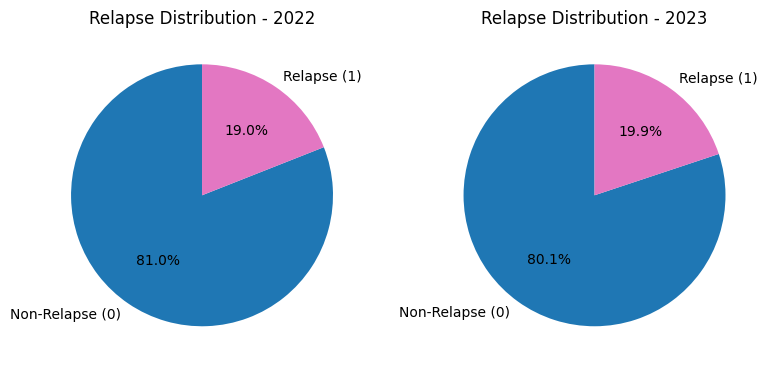

In [13]:
# plotting the relpase rate for 2022 and 2023 


# Prepare data
relapse_counts_2022 = combined_data[combined_data['YEAR'] == 2022]['RELAPSE_CLASS'].value_counts(normalize=True)
relapse_counts_2023 = combined_data[combined_data['YEAR'] == 2023]['RELAPSE_CLASS'].value_counts(normalize=True)

# Ensure both have 0 and 1 represented
relapse_counts_2022 = relapse_counts_2022.reindex([0, 1], fill_value=0)
relapse_counts_2023 = relapse_counts_2023.reindex([0, 1], fill_value=0)

labels = ['Non-Relapse (0)', 'Relapse (1)']
colors = ['#1f77b4', '#e377c2']


fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# 2022 Pie Chart
axes[0].pie(relapse_counts_2022, labels=labels, autopct='%1.1f%%', startangle=90,
            colors=colors)
axes[0].set_title('Relapse Distribution - 2022')

# 2023 Pie Chart
axes[1].pie(relapse_counts_2023, labels=labels, autopct='%1.1f%%', startangle=90,
            colors=colors)
axes[1].set_title('Relapse Distribution - 2023')

plt.tight_layout()
plt.show()

In [4]:
# features to drop before training

target_leak_features = treatment_vars + past_month_use_vars 
other_feat = ['USE_SUBSTANCE_LASTMONTH', 'RECEIVED_TREATMENT', 'RELAPSE_SCORE', 'RELAPSE_CLASS','YEAR']

# creating the input feature only 
input_feat_data = combined_data.drop(columns=target_leak_features+other_feat, axis=1)

# creating the targt
target_data= combined_data['RELAPSE_CLASS']
target_data.value_counts()

RELAPSE_CLASS
0    82568
1    19929
Name: count, dtype: int64

In [5]:
input_feat_data

,CATAG7,HEALTH,EDUHIGHCAT,IRSEX,NEWRACE2,BOOKED,COCAGE,CRKAGE,ECSTMOAGE,HALLUCAGE,HERAGE,METHAMAGE,MJAGE,PNRNMAGE,SEDNMAGE,STMNMAGE,TRQNMAGE,AMIPY,IRAMDEYR,SPDPSTMON,KRATOMFLAG,KRATOMYR,CRKYR,UD5CNSANY,UD5ILALANY,UD5ILLANY,UD5OPIANY,UD5TRQSDANY,SVYROPIANY,SVYRPSYANY,SVYRSUDANY,CCDAYPYR,CRKYDAYS,METHNDAYYR,INHNDAYYR,HALLNDAYYR,HERYDAYS,MRJYDAYS,COCYDAYS,IRPYUD5ALC,MJYRTOT,COCYR,HERYR,METHAMYR,INHALYR,PNRNMYR,MRJYR,HALLUCYR,TRQNMYR,STMNMYR,SEDNMYR,LSDYR,OPIANYYR
0,7.0,2.0,3.0,1.0,7.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,2.0,2.0,1.0,1.0,2.0,20.0,991.0,23.0,21.0,991.0,991.0,17.0,993.0,993.0,993.0,993.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,993.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,3.0,2.0,2.0,4.0,1.0,991.0,991.0,991.0,991.0,991.0,20.0,991.0,991.0,991.0,991.0,991.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,4.0,3.0,991.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,1.0,4.0,1.0,6.0,1.0,991.0,991.0,991.0,15.0,991.0,991.0,15.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,2.0,1.0,1.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102492,7.0,4.0,4.0,2.0,1.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
102493,7.0,3.0,2.0,1.0,2.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102494,6.0,2.0,2.0,2.0,2.0,1.0,991.0,991.0,21.0,21.0,991.0,991.0,18.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102495,6.0,2.0,2.0,2.0,4.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,15.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# scaling the data 

def standardscaling(data):
    original_data = data.copy()
    # numerical_data = data.select_dtypes(include=['float64', 'int64'])  # all data are numerical at the moment
    scaler = StandardScaler()
    scaled_numerical_data = scaler.fit_transform(data)
    scaled_data = pd.DataFrame(scaled_numerical_data, columns=original_data.columns)
    return scaled_data

input_feat_data_scaled = standardscaling(input_feat_data)
input_feat_data_scaled


,CATAG7,HEALTH,EDUHIGHCAT,IRSEX,NEWRACE2,BOOKED,COCAGE,CRKAGE,ECSTMOAGE,HALLUCAGE,HERAGE,METHAMAGE,MJAGE,PNRNMAGE,SEDNMAGE,STMNMAGE,TRQNMAGE,AMIPY,IRAMDEYR,SPDPSTMON,KRATOMFLAG,KRATOMYR,CRKYR,UD5CNSANY,UD5ILALANY,UD5ILLANY,UD5OPIANY,UD5TRQSDANY,SVYROPIANY,SVYRPSYANY,SVYRSUDANY,CCDAYPYR,CRKYDAYS,METHNDAYYR,INHNDAYYR,HALLNDAYYR,HERYDAYS,MRJYDAYS,COCYDAYS,IRPYUD5ALC,MJYRTOT,COCYR,HERYR,METHAMYR,INHALYR,PNRNMYR,MRJYR,HALLUCYR,TRQNMYR,STMNMYR,SEDNMYR,LSDYR,OPIANYYR
0,0.879724,-0.371817,-0.101038,-1.102727,1.740479,-0.086474,0.368693,0.164595,0.301046,0.449212,0.141279,0.222114,0.964828,0.062956,0.023204,0.061406,0.049255,-0.570557,-0.336114,-0.324431,-0.144732,-0.085219,-0.036316,-0.122485,-0.496745,-0.363560,-0.132598,-0.087342,0.125269,0.159406,0.462067,0.115916,0.034552,0.080540,0.098405,0.199809,0.042266,0.507822,0.119393,-0.361199,0.578629,-0.120584,-0.048243,-0.091283,-0.101196,-0.174891,-0.596699,-0.202305,-0.124359,-0.139408,-0.054631,-0.098354,-0.552791
1,0.879724,-0.371817,-0.962039,-1.102727,-0.706071,-0.086474,-2.716530,0.164595,-3.315613,-2.223122,0.141279,0.222114,-1.039004,0.095000,0.105945,0.094367,0.090376,1.752674,-0.336114,-0.324431,-0.144732,-0.085219,-0.036316,-0.122485,2.013107,-0.363560,-0.132598,-0.087342,0.125269,0.159406,-1.559724,0.133418,0.034552,0.080540,0.098405,0.199809,0.042266,0.507822,0.119393,2.768554,0.583912,-0.120584,-0.048243,-0.091283,-0.101196,-0.174891,-0.596699,-0.202305,-0.124359,-0.139408,-0.054631,-0.098354,-0.552791
2,0.879724,0.661987,-0.962039,0.906842,0.517204,-0.193182,0.368693,0.164595,0.301046,0.449212,0.141279,-4.511885,0.964828,0.062956,0.023204,0.061406,0.049255,1.752674,2.975179,3.082315,-0.144732,-0.085219,-0.036316,8.164238,2.013107,2.750579,-0.132598,-0.087342,0.125269,0.159406,-0.548829,0.115916,0.034552,-3.606411,0.098405,0.199809,0.042266,0.507822,0.119393,-0.361199,0.578629,-0.120584,-0.048243,10.954990,-0.101196,-0.174891,-0.596699,-0.202305,-0.124359,-0.139408,-0.054631,-0.098354,-0.552791
3,0.879724,-1.405622,0.759962,-1.102727,1.332721,-0.193182,0.368693,0.164595,0.301046,-2.239652,0.141279,0.222114,-1.043119,0.062956,0.023204,0.061406,0.049255,-0.570557,-0.336114,-0.324431,-0.144732,-0.085219,-0.036316,-0.122485,-0.496745,-0.363560,-0.132598,-0.087342,0.125269,0.159406,0.462067,0.115916,0.034552,0.080540,0.098405,0.199809,0.042266,0.507822,0.119393,-0.361199,0.583912,-0.120584,-0.048243,-0.091283,-0.101196,-0.174891,-0.596699,-0.202305,-0.124359,-0.139408,-0.054631,-0.098354,-0.552791
4,-1.136189,0.661987,-0.962039,-1.102727,-0.706071,-0.086474,0.368693,0.164595,0.301046,0.449212,0.141279,0.222114,0.964828,0.062956,0.023204,0.061406,0.049255,-0.570557,-0.336114,-0.324431,-0.144732,-0.085219,-0.036316,-0.122485,-0.496745,-0.363560,-0.132598,-0.087342,0.125269,0.159406,0.462067,0.115916,0.034552,0.080540,0.098405,0.199809,0.042266,0.507822,0.119393,-0.361199,0.578629,-0.120584,-0.048243,-0.091283,-0.101196,-0.174891,-0.596699,-0.202305,-0.124359,-0.139408,-0.054631,-0.098354,-0.552791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102492,0.879724,1.695791,0.759962,0.906842,-0.706071,-0.086474,0.368693,0.164595,0.301046,0.449212,0.141279,0.222114,0.964828,0.062956,0.023204,0.061406,0.049255,-0.570557,-0.336114,-0.324431,-0.144732,-0.085219,-0.036316,-0.122485,-0.496745,-0.363560,-0.132598,-0.087342,0.125269,0.159406,0.462067,0.115916,0.034552,0.080540,0.098405,0.199809,0.042266,0.507822,0.119393,-0.361199,0.578629,-0.120584,-0.048243,-0.091283,-0.101196,-0.174891,-0.596699,-0.202305,-0.124359,-0.139408,-0.054631,-0.098354,1.809002
102493,0.879724,0.661987,-0.962039,-1.102727,-0.298313,-0.086474,0.368693,0.164595,0.301046,0.449212,0.141279,0.222114,0.964828,0.062956,0.023204,0.061406,0.049255,-0.570557,-0.336114,-0.324431,-0.144732,-0.085219,-0.036316,-0.122485,-0.496745,-0.363560,-0.132598,-0.087342,0

### Modeling

In [11]:
# defining the models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


# train/test split based on the scaled data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(input_feat_data_scaled, target_data, test_size=0.2, random_state=42, )#stratify=target_data)


# # First split into train and temp (validation + test)
# X_train_scaled, X_temp_scaled, y_train, y_temp = train_test_split(
#     input_feat_data_scaled, target_data, 
#     test_size=0.4,  # 40% will be split into val/test
#     random_state=42,
#     stratify=target_data
# )

# # Then split temp into validation and test
# X_val_scaled, X_test_scaled, y_val, y_test = train_test_split(
#     X_temp_scaled, y_temp,
#     test_size=0.5,  # split the 40% equally: 20% validation, 20% test
#     random_state=42,
#     stratify=y_temp
# )

In [13]:
print (X_train_scaled.shape)
print (X_test_scaled.shape)

(81997, 53)
(20500, 53)


In [ ]:
# train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    # y_pred_val = model.predict(X_val_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    # accuracy_val = accuracy_score(y_val, y_pred_val)

    results[name] = accuracy
    # results[name] = accuracy_val

# show results
results_df = pd.DataFrame(list(results.items()), columns=["MODEL", "ACCURACY"])
results_df


/opt/anaconda3/envs/py312_pjt/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:36:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,MODEL,ACCURACY
0,Random Forest,0.939122
1,Extra Trees,0.936537
2,XGBoost,0.942146
3,Gradient Boosting,0.942000


#### Neural Network

In [14]:
### Neural Network

# define neural network model
def build_nn_model():
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train_scaled.shape[1],), activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))  # binary classification
    
    model.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

nn_model = KerasClassifier(build_fn=build_nn_model, epochs=15, batch_size=256, verbose=0)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
nn_model.fit(X_train_scaled, y_train, validation_split=0.1, callbacks=[early_stop])

y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype("int32")
nn_accuracy = accuracy_score(y_test, y_pred_nn)

# add to results
results["Neural Network"] = nn_accuracy
results_df = pd.DataFrame(list(results.items()), columns=["MODEL", "ACCURACY"])
results_df

/opt/anaconda3/envs/py312_pjt/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/envs/py312_pjt/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


,MODEL,ACCURACY
0,Random Forest,0.939122
1,Extra Trees,0.936537
2,XGBoost,0.942146
3,Gradient Boosting,0.942000
4,Neural Network,0.939707


In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predictions (make sure they are binary: 0 or 1)
y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype("int32")

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred_nn)
recall = recall_score(y_test, y_pred_nn)
f1 = f1_score(y_test, y_pred_nn)

# Display the results
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Precision: 0.8485
Recall:    0.8374
F1 Score:  0.8429


2025-04-27 16:48:05.903316: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-27 16:48:05.905144: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-27 16:48:05.906376: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-27 16:48:05.919373: I tensorflow/core/platform/cpu_featu

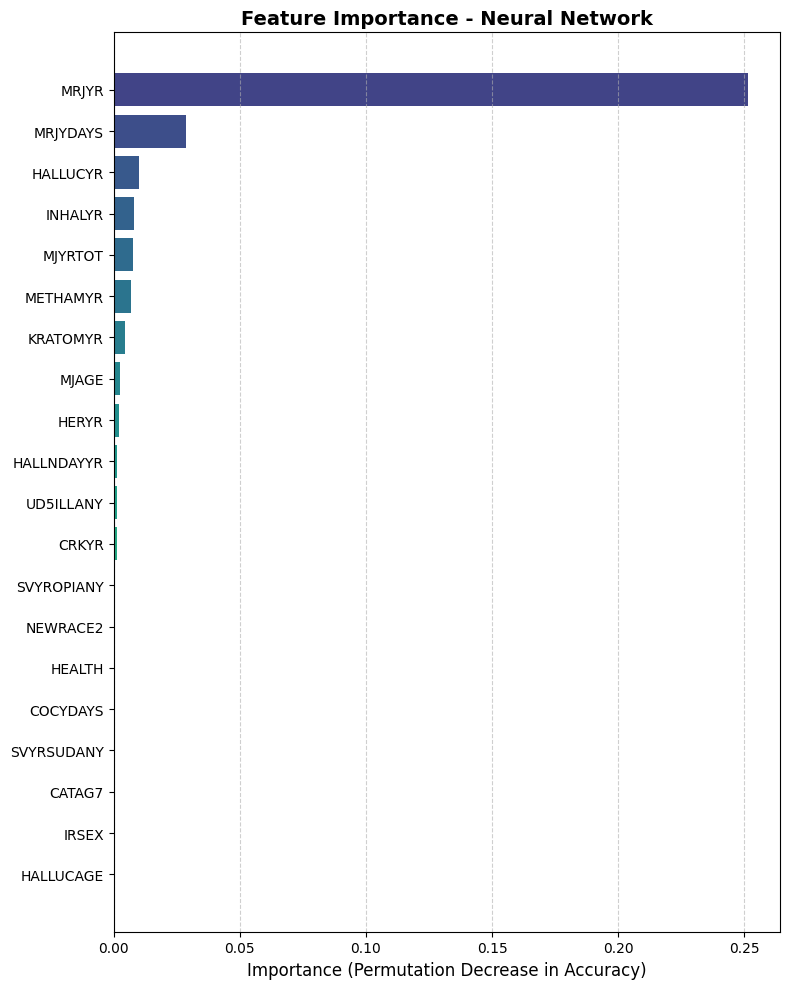

In [17]:
# feature Importance for NN Model Only 


from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Calculate permutation importance
perm_importance = permutation_importance(
    nn_model,
    X_test_scaled,
    y_test,
    scoring='accuracy',  # you can change this depending on what you care about
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Get importances
importances = perm_importance.importances_mean

# Sort the importances
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices][:20]  # Top 20
feature_names = input_feat_data_scaled.columns if hasattr(input_feat_data_scaled, 'columns') else [f"feature_{i}" for i in range(X_train_scaled.shape[1])]
sorted_features = [feature_names[i] for i in indices[:20]]

# color map
cmap = cm.get_cmap('viridis')
colors = cmap(np.linspace(0.2, 0.9, len(sorted_importances)))

# Plot
plt.figure(figsize=(8, 10))
bars = plt.barh(range(len(sorted_importances)), sorted_importances, color=colors)
plt.title("Feature Importance - Neural Network", fontsize=14, fontweight='bold')
plt.yticks(range(len(sorted_importances)), sorted_features)
plt.xlabel("Importance (Permutation Decrease in Accuracy)", fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_1036/1079008214.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


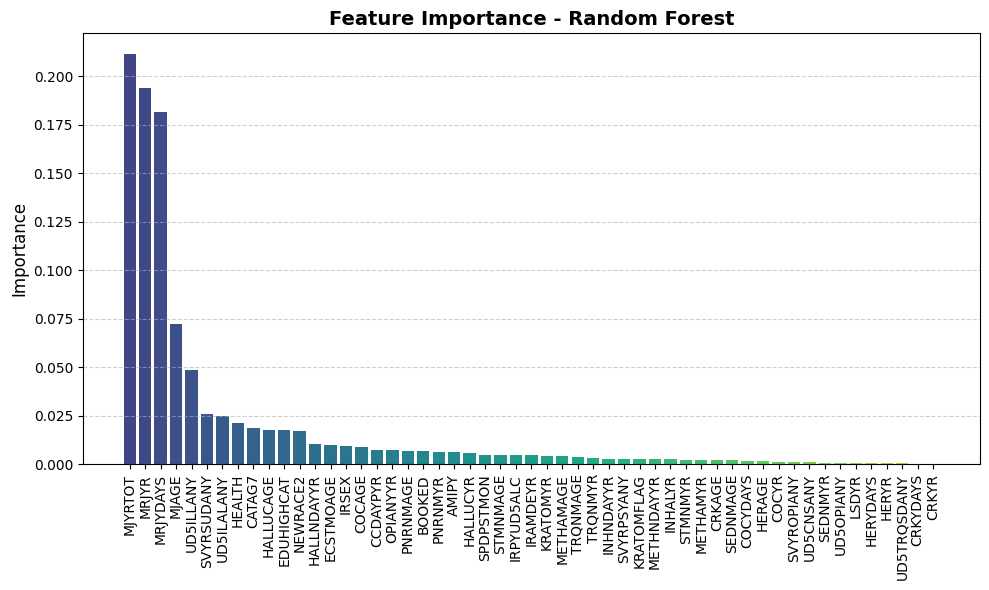

/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_1036/1079008214.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


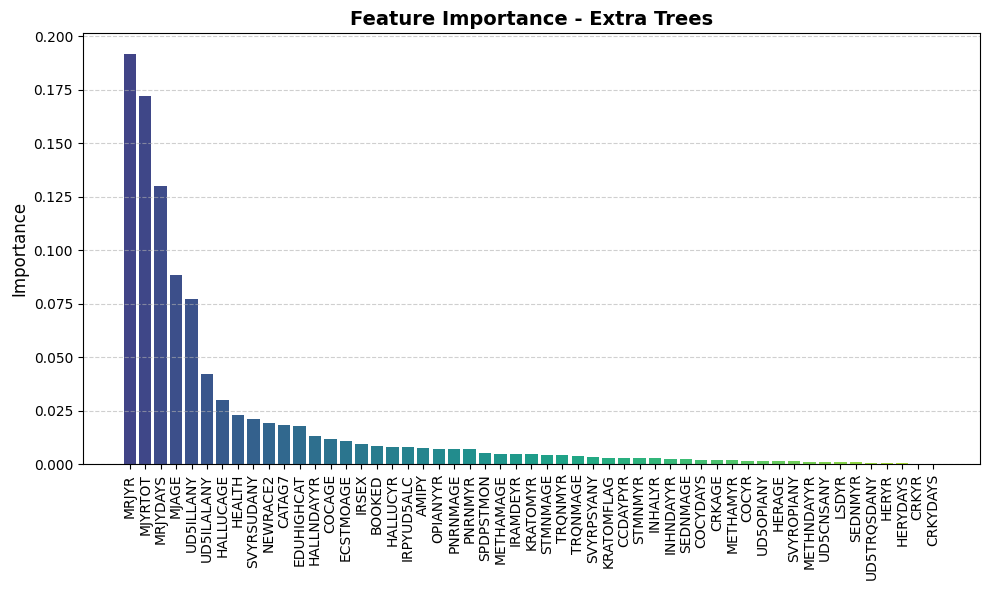

/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_1036/1079008214.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


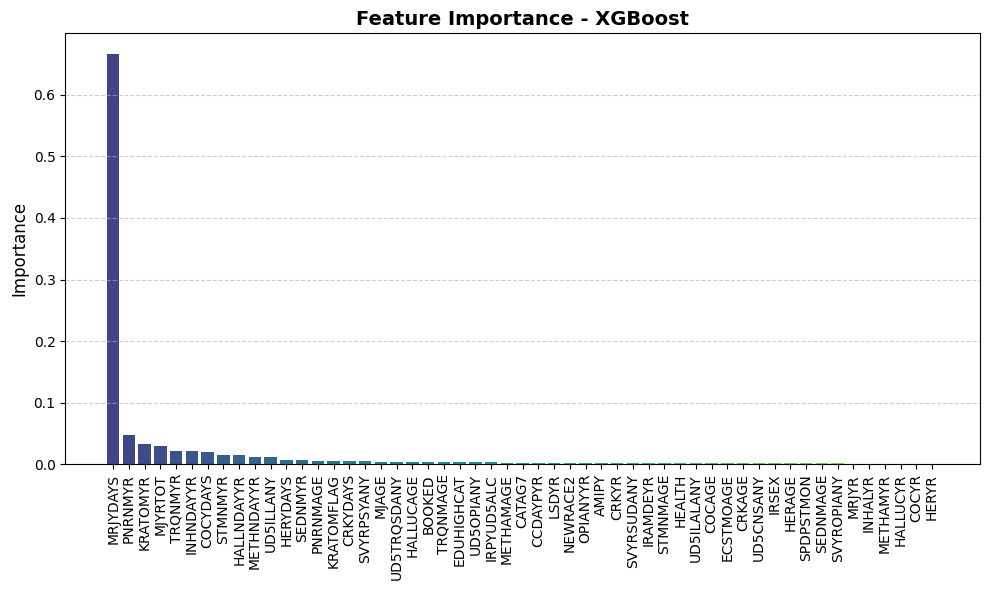

/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_1036/1079008214.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


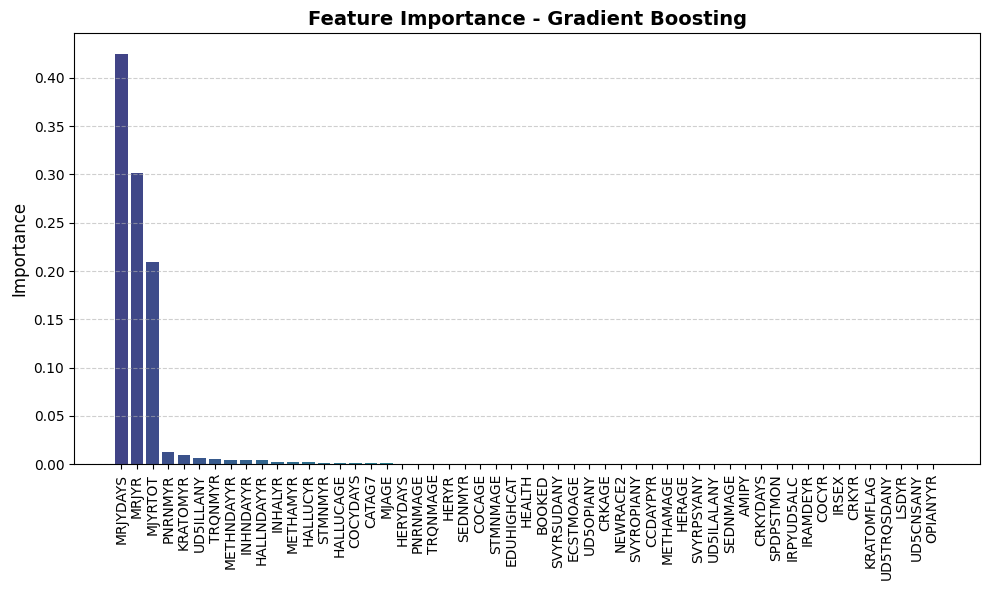

In [22]:
# store feature importances for each model
feature_importances = {}

# define feature names
feature_names = input_feat_data_scaled.columns if hasattr(input_feat_data_scaled, 'columns') else [f"feature_{i}" for i in range(X_train_scaled.shape[1])]

for name, model in models.items():
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        feature_importances[name] = importances

        # sort features by importance
        indices = np.argsort(importances)[::-1]
        sorted_importances = importances[indices]
        sorted_features = [feature_names[i] for i in indices]

        # color map
        cmap = cm.get_cmap('viridis')
        colors = cmap(np.linspace(0.2, 0.9, len(importances)))

        # plot
        plt.figure(figsize=(10, 6))
        bars = plt.bar(range(len(sorted_importances)), sorted_importances, color=colors)
        plt.title(f"Feature Importance - {name}", fontsize=14, fontweight='bold')
        plt.xticks(range(len(sorted_importances)), sorted_features, rotation=90)
        plt.ylabel("Importance", fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Model '{name}' does not support feature_importances_.")


/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_5600/631847448.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


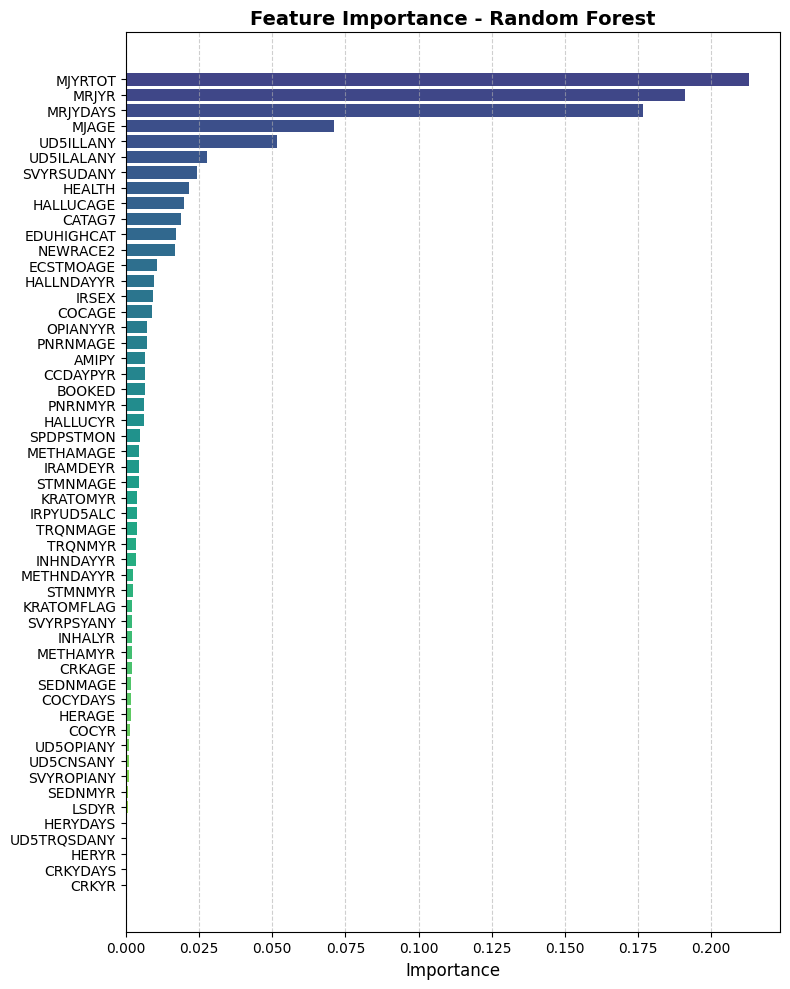

/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_5600/631847448.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


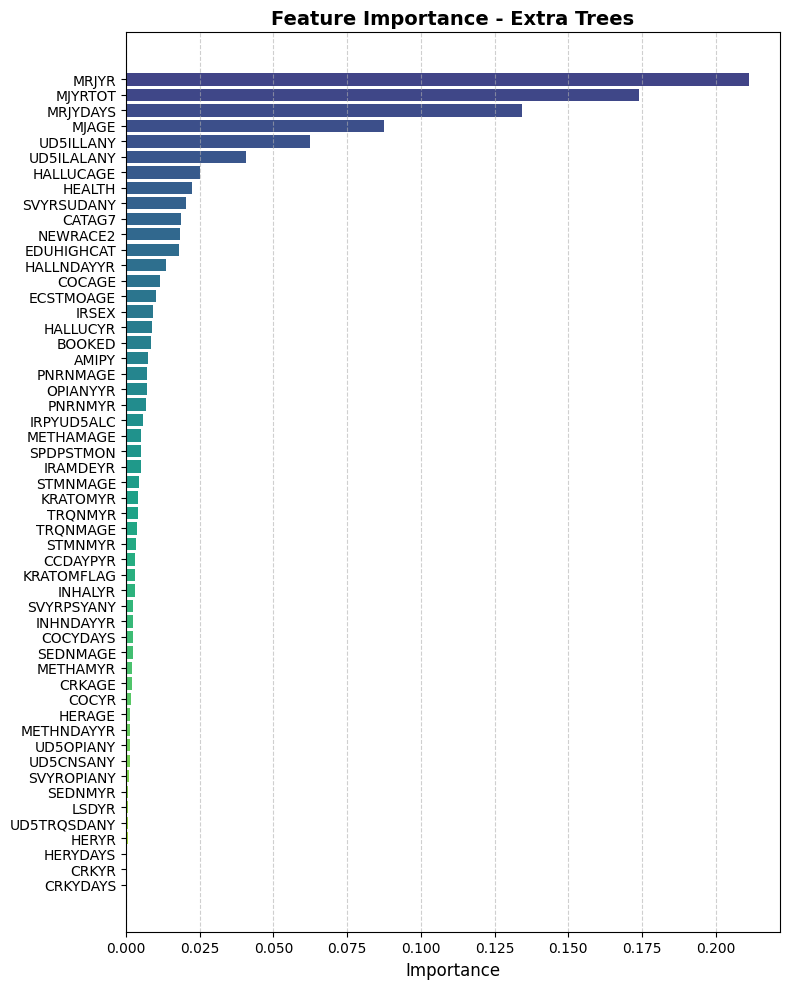

/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_5600/631847448.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


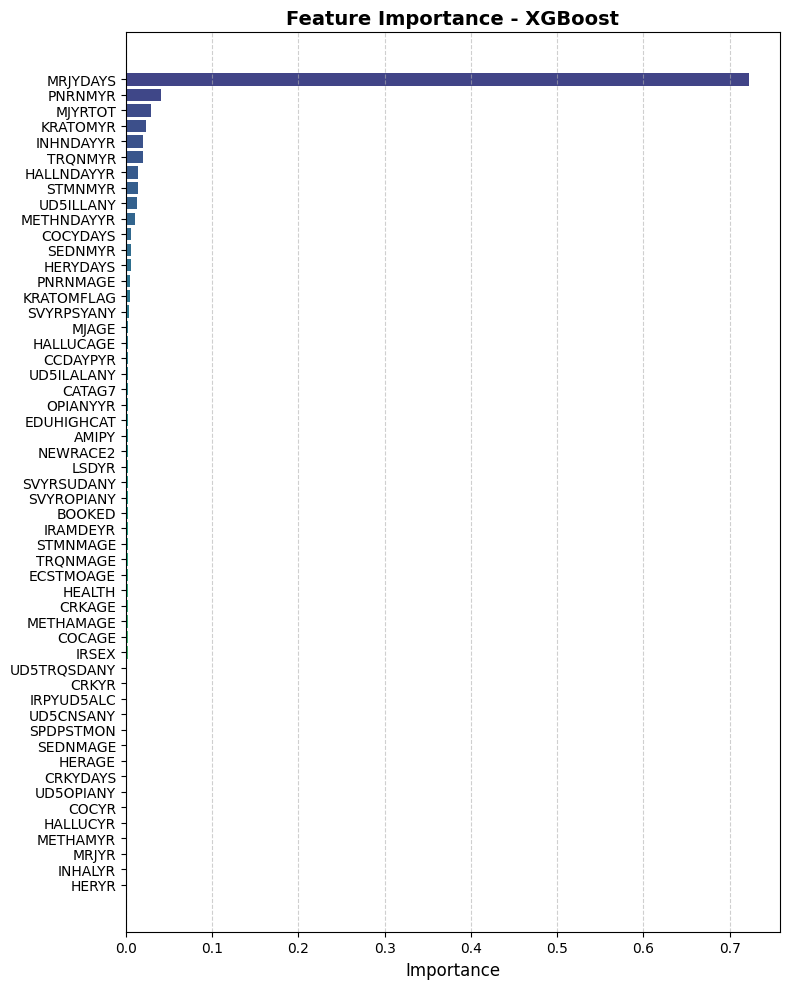

/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_5600/631847448.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


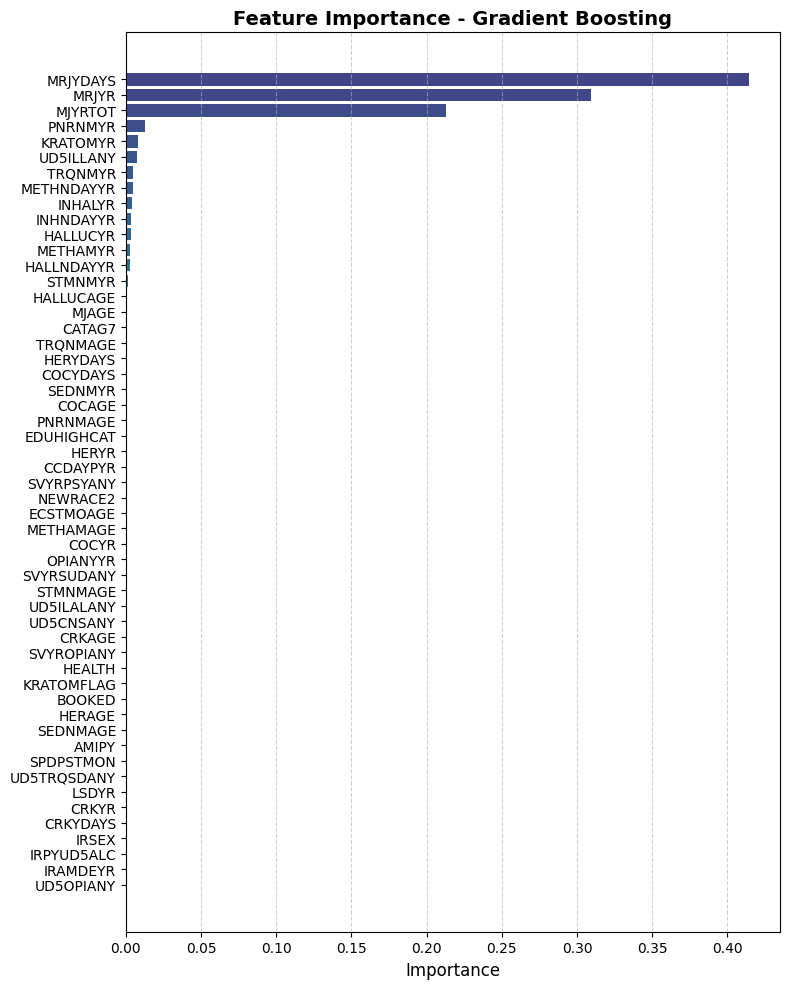

In [9]:
# store feature importances for each model
feature_importances = {}

# define feature names
feature_names = input_feat_data_scaled.columns if hasattr(input_feat_data_scaled, 'columns') else [f"feature_{i}" for i in range(X_train_scaled.shape[1])]

for name, model in models.items():
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        feature_importances[name] = importances

        # sort features by importance
        indices = np.argsort(importances)[::-1]
        sorted_importances = importances[indices]
        sorted_features = [feature_names[i] for i in indices]

        # color map
        cmap = cm.get_cmap('viridis')
        colors = cmap(np.linspace(0.2, 0.9, len(importances)))

        # plot (vertical layout using barh)
        plt.figure(figsize=(8, 10))
        bars = plt.barh(range(len(sorted_importances)), sorted_importances, color=colors)
        plt.title(f"Feature Importance - {name}", fontsize=14, fontweight='bold')
        plt.yticks(range(len(sorted_importances)), sorted_features)
        plt.xlabel("Importance", fontsize=12)
        plt.gca().invert_yaxis()  # most important feature at the top
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Model '{name}' does not support feature_importances_.")


/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_1036/2175541040.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


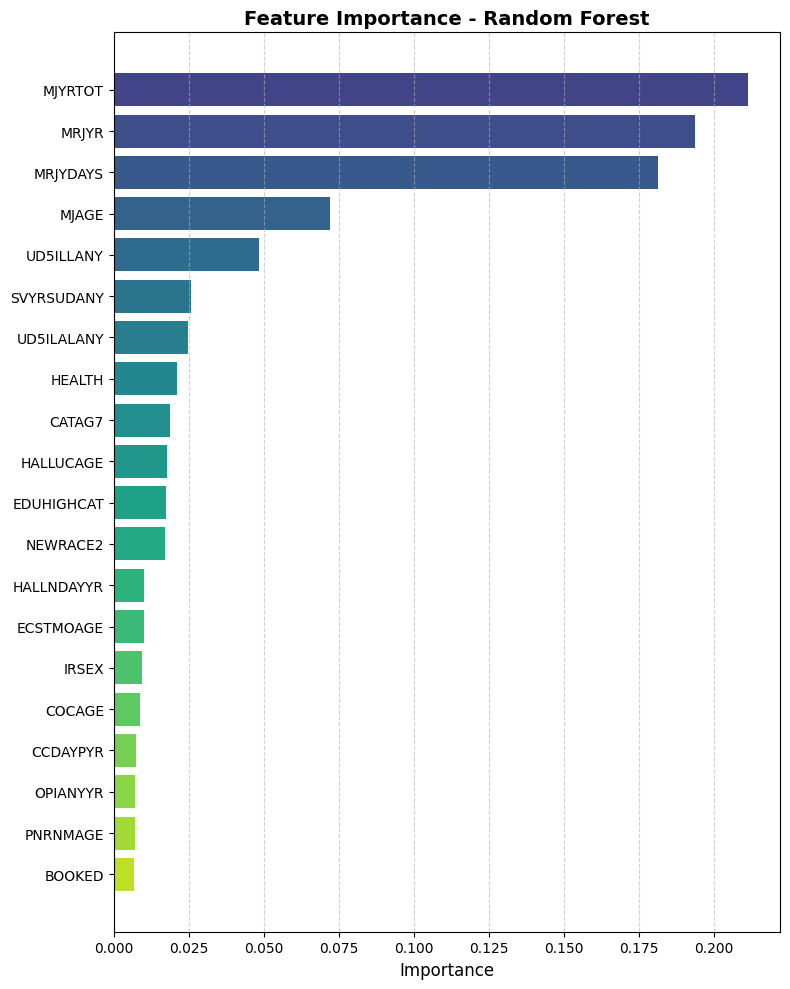

/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_1036/2175541040.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


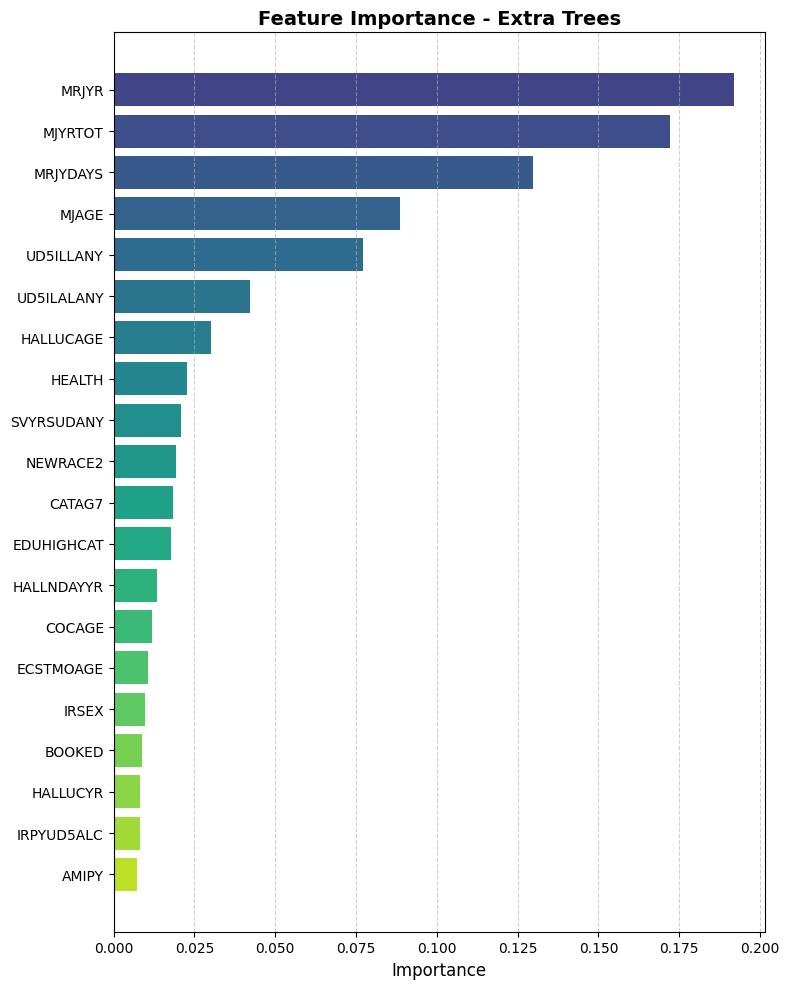

/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_1036/2175541040.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


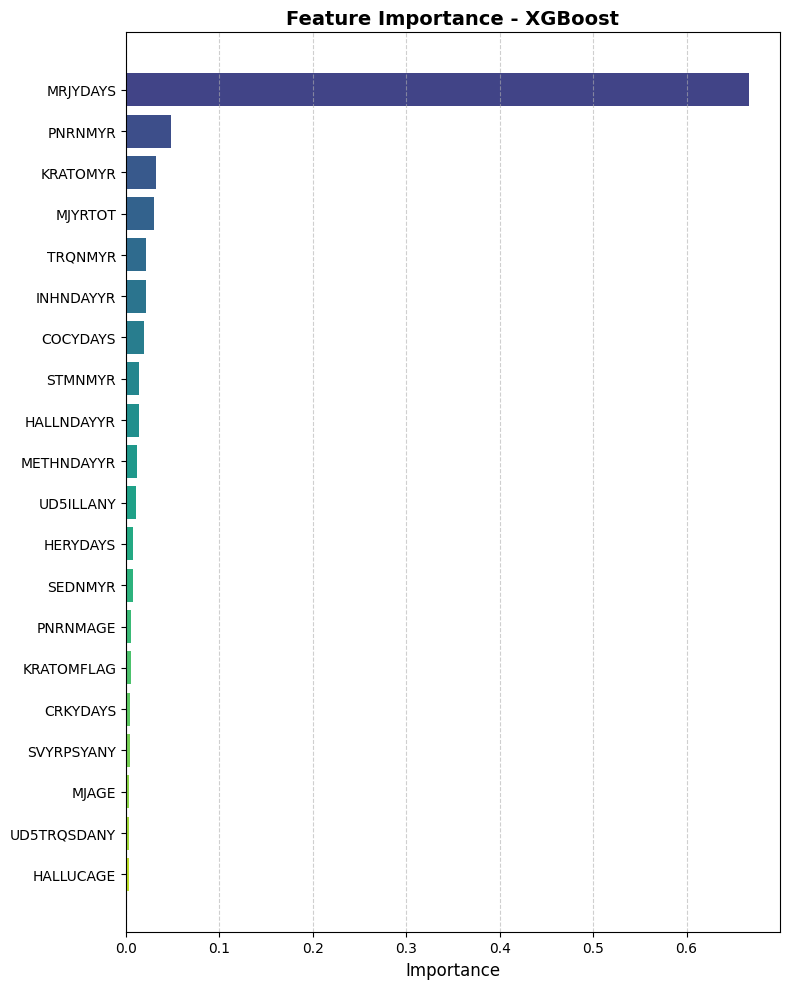

/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_1036/2175541040.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


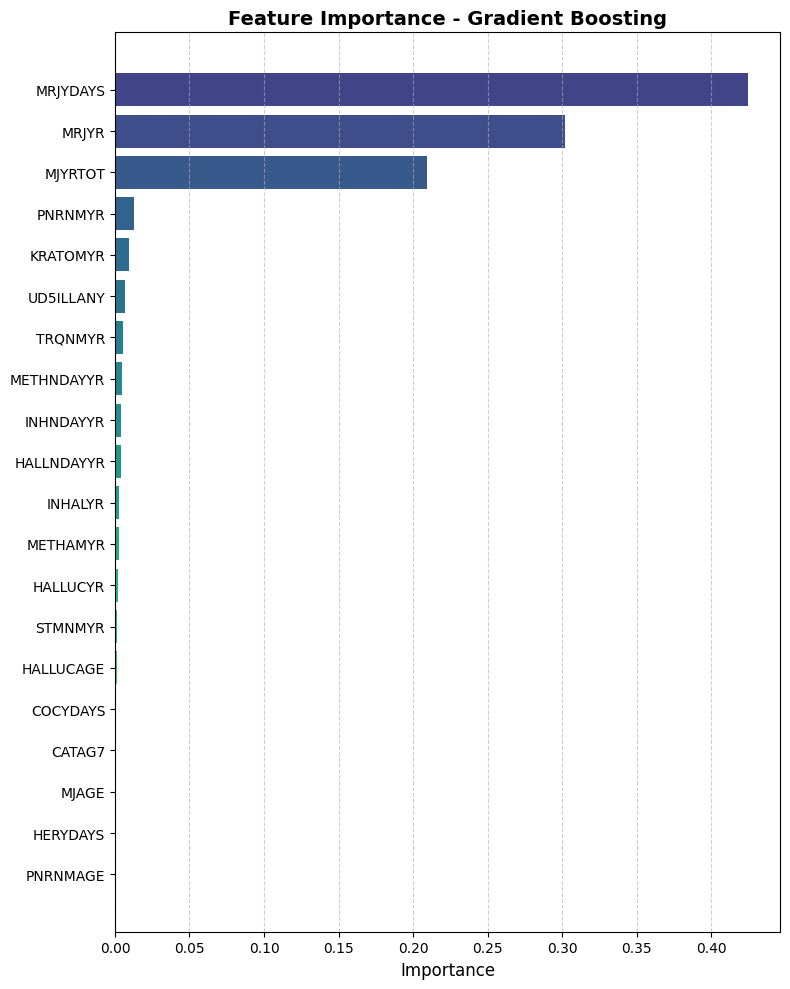

In [16]:
## Feature Importance For Top 20 
#  

# store feature importances for each model
feature_importances = {}

# define feature names
feature_names = input_feat_data_scaled.columns if hasattr(input_feat_data_scaled, 'columns') else [f"feature_{i}" for i in range(X_train_scaled.shape[1])]

for name, model in models.items():
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        feature_importances[name] = importances

        # sort features by importance
        indices = np.argsort(importances)[::-1]
        sorted_importances = importances[indices][:20]  # Only top 20
        sorted_features = [feature_names[i] for i in indices[:20]]  # Only top 20

        # color map
        cmap = cm.get_cmap('viridis')
        colors = cmap(np.linspace(0.2, 0.9, len(sorted_importances)))

        # plot (vertical layout using barh)
        plt.figure(figsize=(8, 10))
        bars = plt.barh(range(len(sorted_importances)), sorted_importances, color=colors)
        plt.title(f"Feature Importance - {name}", fontsize=14, fontweight='bold')
        plt.yticks(range(len(sorted_importances)), sorted_features)
        plt.xlabel("Importance", fontsize=12)
        plt.gca().invert_yaxis()  # most important feature at the top
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Model '{name}' does not support feature_importances_.")


/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_1787/861389279.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ACCURACY', y='MODEL', data=results_df.sort_values(by='ACCURACY', ascending=False), palette='viridis')


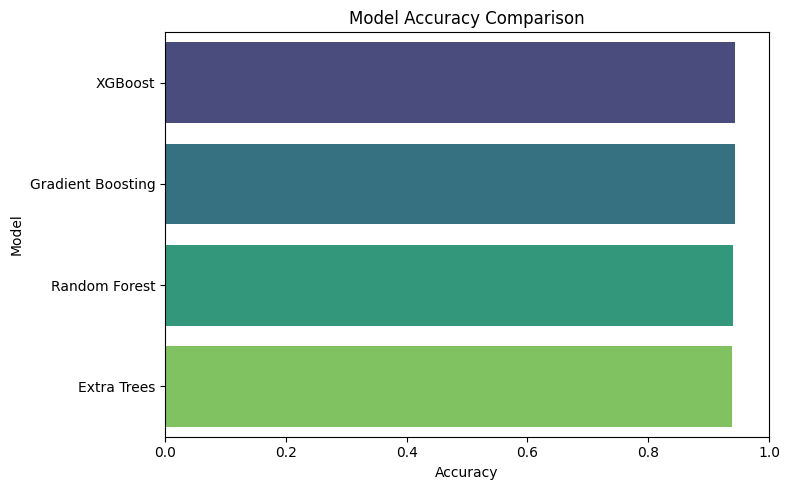

In [33]:
#  accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='ACCURACY', y='MODEL', data=results_df.sort_values(by='ACCURACY', ascending=False), palette='viridis')
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_5600/590678839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ACCURACY', y='MODEL', data=results_df, palette='crest')


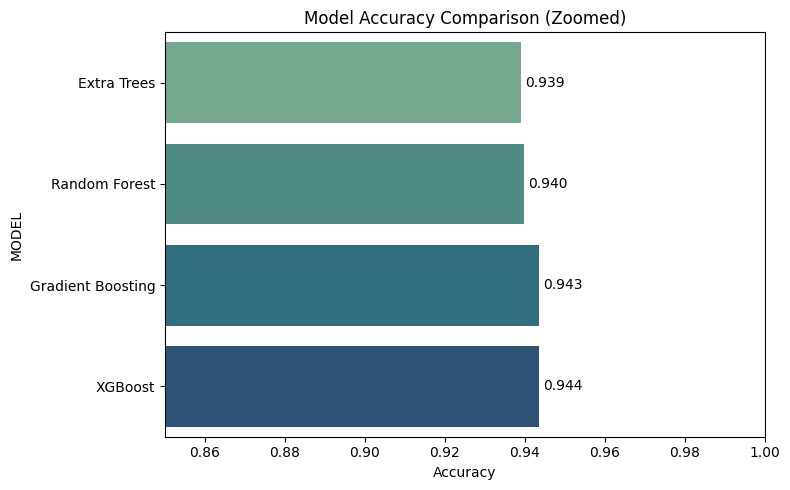

In [10]:
# sort models by accuracy
results_df = results_df.sort_values(by='ACCURACY', ascending=True)

plt.figure(figsize=(8, 5))
sns.barplot(x='ACCURACY', y='MODEL', data=results_df, palette='crest')
for i, (acc, model) in enumerate(zip(results_df['ACCURACY'], results_df['MODEL'])):
    plt.text(acc + 0.001, i, f"{acc:.3f}", va='center')
plt.title("Model Accuracy Comparison (Zoomed)")
plt.xlabel("Accuracy")
plt.xlim(0.85, 1.0)  # zoom in 
plt.tight_layout()
plt.show()

In [21]:
# initialize results list
metrics = {
    'MODEL': [],
    'ACCURACY': [],
    'PRECISION': [],
    'RECALL': [],
      'F1-SCORE': [],
    'AUC': []
}

# loop through each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # needed for AUC

    metrics['MODEL'].append(name)
    metrics['ACCURACY'].append(accuracy_score(y_test, y_pred))
    metrics['PRECISION'].append(precision_score(y_test, y_pred))
    metrics['RECALL'].append(recall_score(y_test, y_pred))
    metrics['F1-SCORE'].append(f1_score(y_test, y_pred))
    metrics['AUC'].append(roc_auc_score(y_test, y_proba))

# convert to DataFrame
metrics_df = pd.DataFrame(metrics)
metrics_df

/opt/anaconda3/envs/py312_pjt/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:56:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,MODEL,ACCURACY,PRECISION,RECALL,F1-SCORE,AUC
0,Random Forest,0.939122,0.835976,0.852020,0.843922,0.983022
1,Extra Trees,0.936537,0.828515,0.846717,0.837517,0.978661
2,XGBoost,0.942146,0.844340,0.858838,0.851527,0.983593
3,Gradient Boosting,0.942000,0.846462,0.854798,0.850609,0.984078


In [23]:
# ---- Evaluation for Neural Network ----
y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype("int32")
y_proba_nn = nn_model.predict_proba(X_test_scaled)[:, 1]   # Probabilities from scikeras

# Create a new row as a DataFrame
nn_row = pd.DataFrame([{
    'MODEL': 'Neural Network',
    'ACCURACY': accuracy_score(y_test, y_pred_nn),
    'PRECISION': precision_score(y_test, y_pred_nn),
    'RECALL': recall_score(y_test, y_pred_nn),
    'F1-SCORE': f1_score(y_test, y_pred_nn),
    'AUC': roc_auc_score(y_test, y_proba_nn)
}])

# Append to existing metrics_df
metrics_df = pd.concat([metrics_df, nn_row], ignore_index=True)
metrics_df

,MODEL,ACCURACY,PRECISION,RECALL,F1-SCORE,AUC
0,Random Forest,0.939122,0.835976,0.852020,0.843922,0.983022
1,Extra Trees,0.936537,0.828515,0.846717,0.837517,0.978661
2,XGBoost,0.942146,0.844340,0.858838,0.851527,0.983593
3,Gradient Boosting,0.942000,0.846462,0.854798,0.850609,0.984078
4,Neural Network,0.939707,0.848516,0.837374,0.842908,0.982939


/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_1036/2879038804.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1-SCORE', y='MODEL', data=metrics_df.sort_values(by='F1-SCORE'), palette='flare')


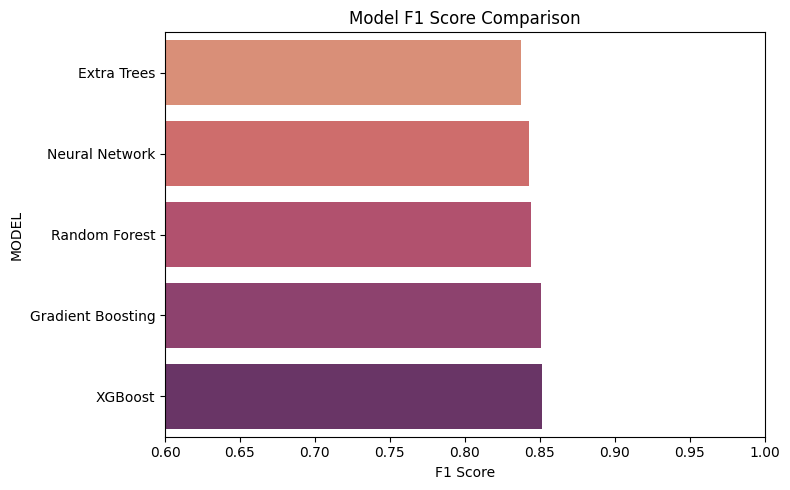

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(x='F1-SCORE', y='MODEL', data=metrics_df.sort_values(by='F1-SCORE'), palette='flare')
plt.title("Model F1 Score Comparison")
plt.xlabel("F1 Score")
plt.xlim(0.6, 1.0)
plt.tight_layout()
plt.show()


/opt/anaconda3/envs/py312_pjt/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:57:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


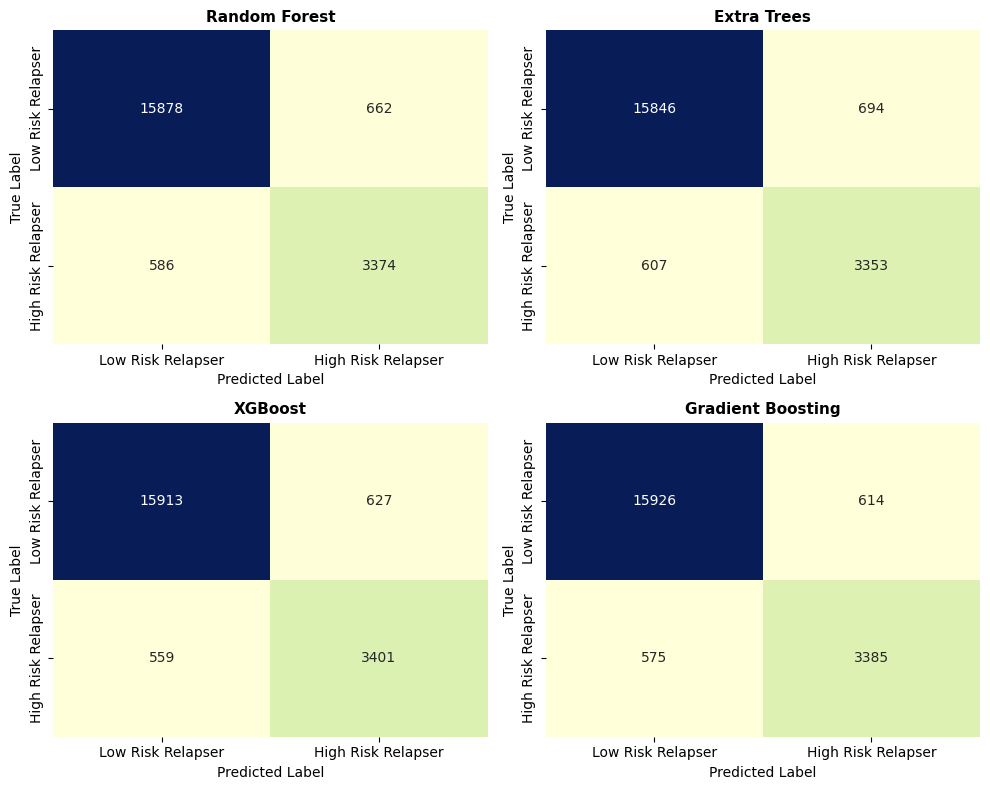

In [25]:

# confusion matrix for each model
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=axes[i], cbar=False,
                xticklabels=["Low Risk Relapser", "High Risk Relapser"],
                yticklabels=["Low Risk Relapser", "High Risk Relapser"])
    
    axes[i].set_title(f"{name}", fontsize=11, fontweight='bold')
    # axes[i].set_title(name, fontsize=14, fontweight='bold')
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()


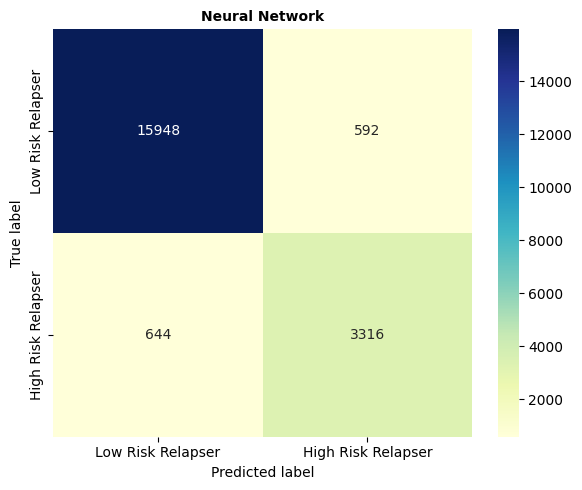

In [28]:
#  confusion matrix Neural Network
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=["Low Risk Relapser", "High Risk Relapser"], 
            yticklabels=["Low Risk Relapser", "High Risk Relapser"])
plt.title("Neural Network", fontsize=10, fontweight='bold')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

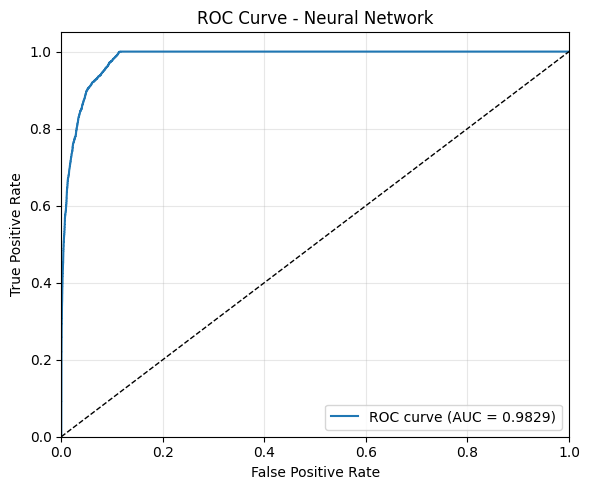

In [37]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = nn_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# XAI Feature Importance

 98%|===================| 20077/20500 [00:41<00:00]        

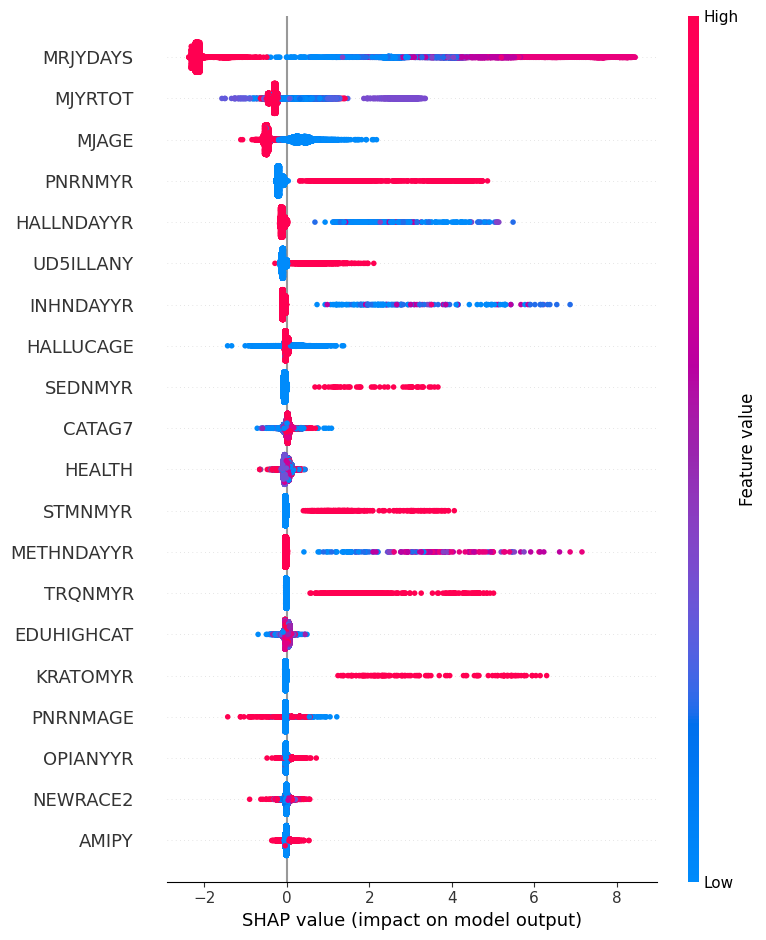

In [10]:
# XAI With XGB

model = models['XGBoost']
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled, feature_names=input_feat_data_scaled.columns)

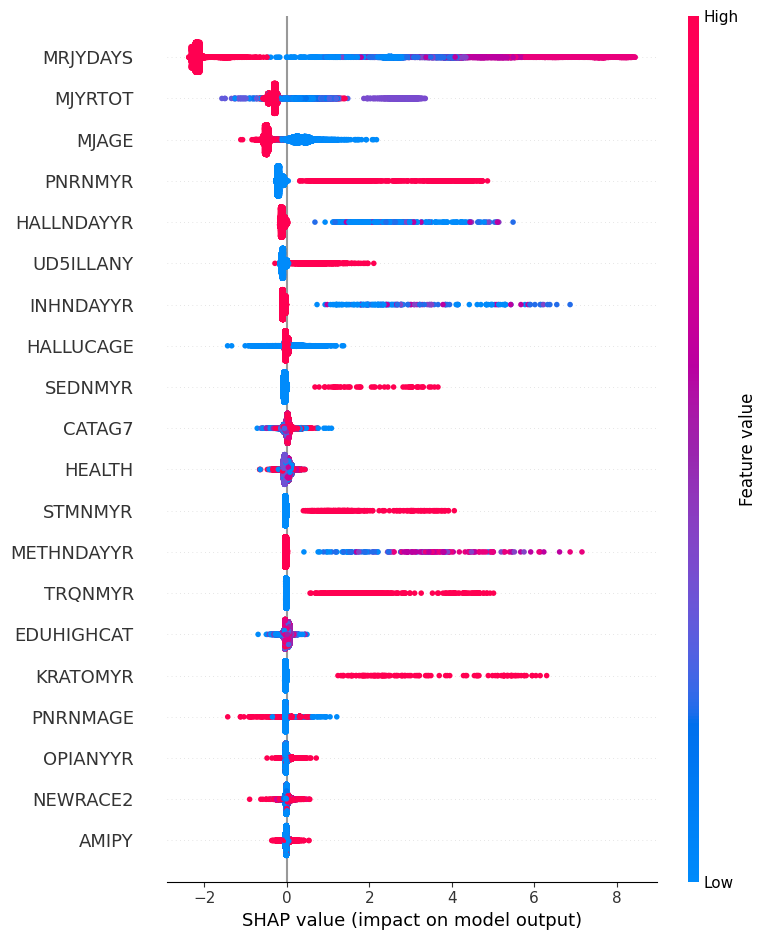

In [11]:
shap.summary_plot(shap_values, X_test_scaled, feature_names=input_feat_data_scaled.columns)


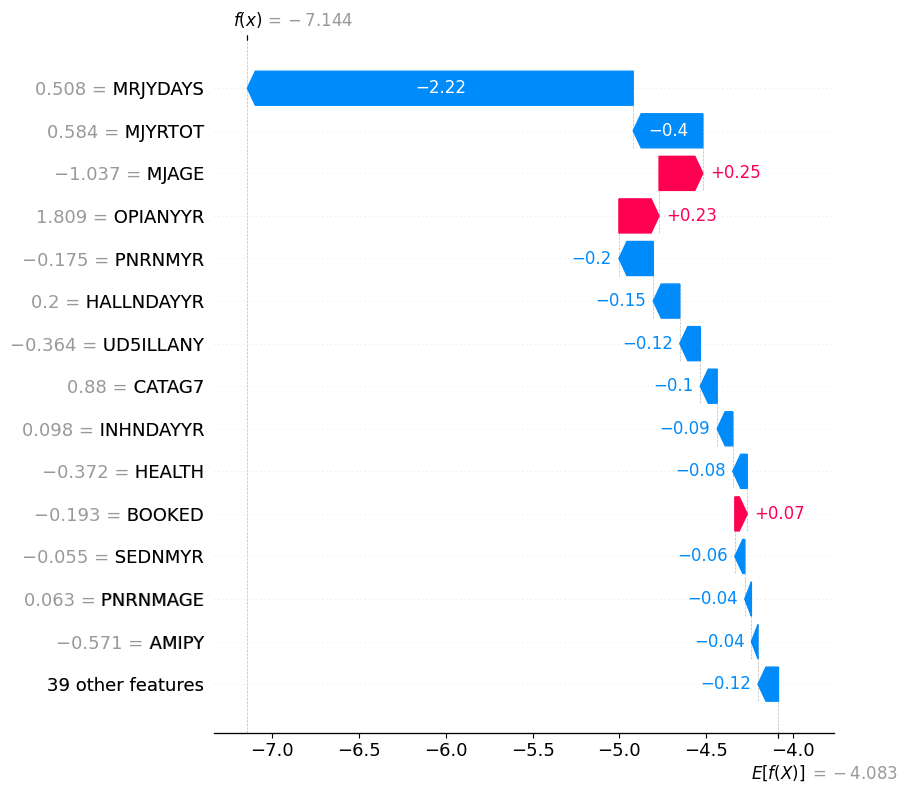

In [13]:
shap.plots.waterfall(shap_values[0], max_display=15)


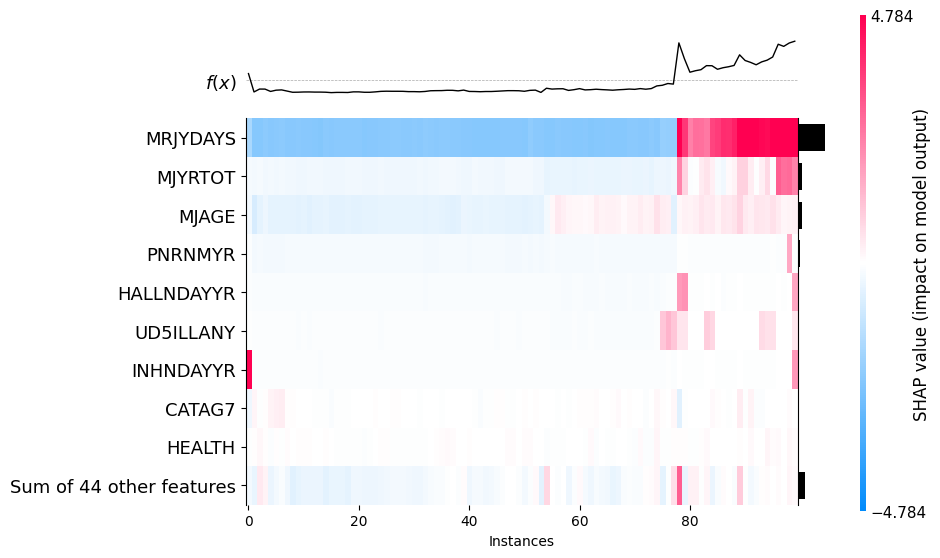

<Axes: xlabel='Instances'>

In [15]:
# shap.plots.force(shap_values[0])

shap.plots.heatmap(shap_values[:100])



In [ ]:
# XAI With RF

model = models['Random Forest']
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled, feature_names=input_feat_data_scaled.columns)

  5%|=                   | 2148/41000 [02:14<40:23]       

In [ ]:
shap.summary_plot(shap_values, X_test_scaled, feature_names=input_feat_data_scaled.columns)


# Other Baseline Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# define the models
baseline_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gaussian NB": GaussianNB()
}

# train and evaluate each
baseline_metrics = {
    'MODEL': [],
    'ACCURACY': [],
    'PRECISION': [],
    'RECALL': [],
    'F1-SCORE': []
}

for name, model in baseline_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Store metrics
    baseline_metrics['MODEL'].append(name)
    baseline_metrics['ACCURACY'].append(accuracy_score(y_test, y_pred))
    baseline_metrics['PRECISION'].append(precision_score(y_test, y_pred))
    baseline_metrics['RECALL'].append(recall_score(y_test, y_pred))
    baseline_metrics['F1-SCORE'].append(f1_score(y_test, y_pred))

# convert to DataFrame
baseline_metrics_df = pd.DataFrame(baseline_metrics)
baseline_metrics_df


,MODEL,ACCURACY,PRECISION,RECALL,F1-SCORE
0,Decision Tree,0.920000,0.802008,0.781485,0.791614
1,Logistic Regression,0.941463,0.877916,0.811841,0.843587
2,Gaussian NB,0.847805,0.652680,0.464375,0.542656


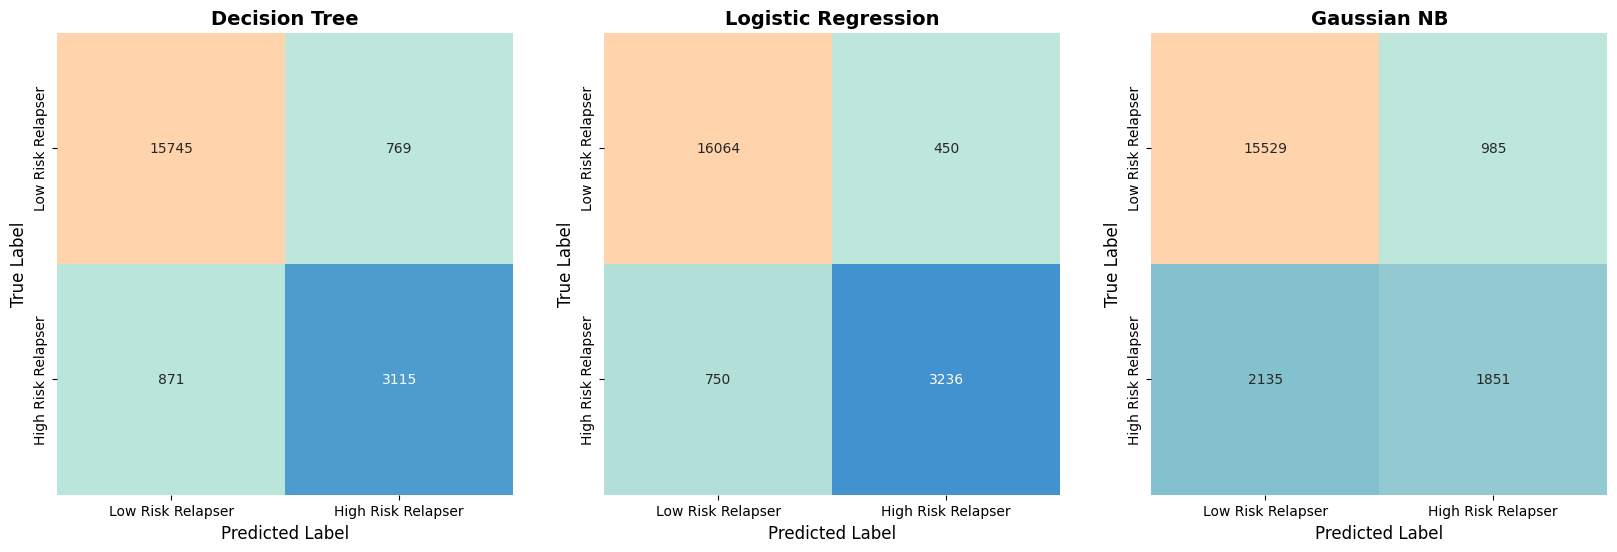

'\n"coolwarm" – red-blue contrast\n"cividis" – colorblind-friendly\n"icefire" – icy glow\n"flare" – vivid and warm\n"rocket" – sleek and bold\n'

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Define models
baseline_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gaussian NB": GaussianNB()
}

# Setup the plot
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
# fig.suptitle("Confusion Matrices (Seaborn Style)", fontsize=18, fontweight='bold')

# Class labels
labels = ["Low Risk Relapser", "High Risk Relapser"]

# Loop through models
for i, (name, model) in enumerate(baseline_models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='icefire', ax=axes[i], cbar=False,
                xticklabels=labels, yticklabels=labels)

    axes[i].set_title(name, fontsize=14, fontweight='bold')
    axes[i].set_xlabel("Predicted Label", fontsize=12)
    axes[i].set_ylabel("True Label", fontsize=12)

# plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

'''
"coolwarm" – red-blue contrast
"cividis" – colorblind-friendly
"icefire" – icy glow
"flare" – vivid and warm
"rocket" – sleek and bold
'''
